In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import webbrowser
import os

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
app_df = pd.read_csv('C:/Users/Asus/OneDrive/Desktop/Playstore Analysis/googleplaystore.csv')
rev_df = pd.read_csv('C:/Users/Asus/OneDrive/Desktop/Playstore Analysis/googleplaystore_user_reviews.csv')

In [4]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
rev_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
#pd.read_csv(): for csv files
#pd.read_excel(): for excel
#pd.read_sql(): SQL Database
#pd.read_json: JSON files

In [7]:
#df.isnull(): finds missing values
#df.dropna(): drops all the rowas and columns having null values from the table
#df.fillna(): replaces the missing values

In [8]:
#df.duplicated(): Indentifies the duplicates in rows
#df.drop_duplicates(): removes duplicates

In [9]:
app_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [10]:
app_df = app_df.dropna(subset=['Rating'])
for column in app_df.columns:
    app_df[column].fillna(app_df[column].mode()[0], inplace = True)
app_df.drop_duplicates(inplace=True)
app_df= app_df[app_df['Rating'] <= 5.0]
rev_df.dropna(subset=['Translated_Review'], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13760\2746652995.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_df[column].fillna(app_df[column].mode()[0], inplace = True)


In [11]:
 app_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [12]:
#converting the installs column by removing the commas an +
app_df['Installs'] = app_df['Installs'].str.replace(',', '')
app_df['Installs'] = app_df['Installs'].str.replace('+', '')

In [13]:
#converting installs type
app_df['Installs']= app_df['Installs'].astype(int)

In [14]:
#converting price to numeric
app_df['Price'] = app_df['Price'].str.replace('$','').astype(float)

In [15]:
app_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [16]:
#merging both columns using inner join
merge_df = pd.merge(app_df, rev_df, on = 'App', how = 'inner')

In [17]:
merge_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59119,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,Nice broser slow browsing speed... make 8mbps ...,Positive,0.100000,0.492308
59120,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,The thing I found missing simple bookmark draw...,Positive,0.225000,0.426786
59121,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,Great Relief unwanted pop ups showing up. What...,Positive,0.650000,0.625000
59122,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up,Hoped found new go-to; LOVE Firefox PC. Aside ...,Positive,0.345455,0.484848


In [18]:
#Data Transformation
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M',''))
    elif 'k' in size:
        return float(size.replace('k',''))//1024
    else:
        return np.nan

app_df['Size'] = app_df['Size'].apply(convert_size)

In [19]:
app_df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10834     2.6
10836    53.0
10837     3.6
10839     NaN
10840    19.0
Name: Size, Length: 8892, dtype: float64

In [20]:
app_df['Installs'] = app_df['Installs'].astype(int)
app_df['Reviews'] = app_df['Reviews'].astype(int)

#Logarithmic
app_df['Log_Installs'] = np.log(app_df['Installs'])
app_df['Log_Reviews'] = np.log(app_df['Reviews'])

In [21]:
 app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,9.210340,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,13.122363,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,15.424948,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,17.727534,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,11.512925,6.874198


In [22]:
def rating_group(rating):
    if rating >= 4:
        return 'Top Rated App'
    elif rating >= 3:
        return 'Above Average'
    elif rating >= 2:
        return 'Average'
    else:
        return 'Below Average'

merge_df['Rating_Group'] = merge_df['Rating'].apply(rating_group)

In [23]:
merge_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Rating_Group
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,Above Average
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333,Above Average
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000,Above Average
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000,Above Average
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000,Above Average


In [24]:
app_df['Revenue'] = app_df['Price'] * app_df['Installs']

In [25]:
#Natural Language Processing

In [26]:
sia = SentimentIntensityAnalyzer()

In [27]:
review = 'I mean the app is bad. I hate the new feature'

sentiment_score = sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.507, 'neu': 0.493, 'pos': 0.0, 'compound': -0.802}


In [28]:
rev_df['Snetiment_Score'] = rev_df['Translated_Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [29]:
rev_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Snetiment_Score
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,-0.6486
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,0.7430
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,-0.7269
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,0.7783
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000,-0.0829


In [30]:
app_df['Last Updated'] = pd.to_datetime(app_df['Last Updated'], errors='coerce')

In [31]:
app_df['Year'] = app_df['Last Updated'].dt.year

In [32]:
#Plotting Bar Charts

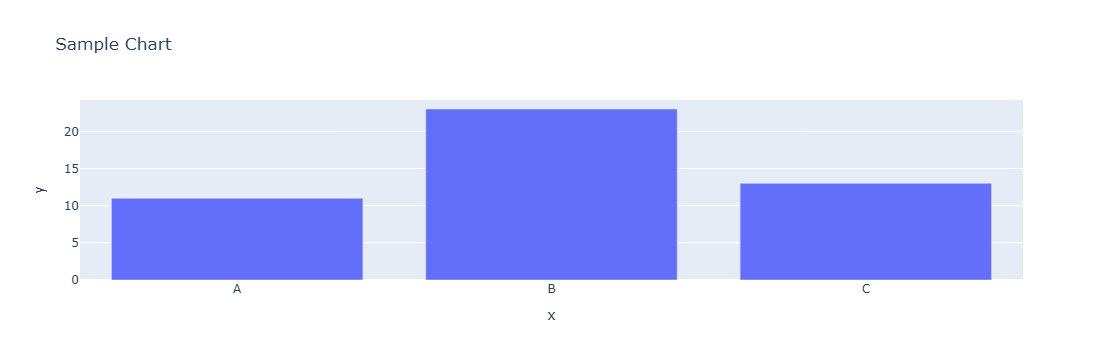

In [33]:
fig = px.bar(x=['A','B','C'], y=[11,23,13], title='Sample Chart')
fig.show()

In [34]:
fig.write_html('interactive_graph.html')

In [35]:
html_files_path = "./"
if not os.path.exists(html_files_path):
    os.makedir(html_files_path)

In [36]:
plot_containers = ""

In [37]:
def save_plot_as_html(fig, filename, insight):
    global plot_containers
    filepath = os.path.join(html_files_path, filename)
    html_content = pio.to_html(fig, full_html=False, include_plotlyjs='inline')
    plot_containers += f"""
    <div class="plot-container" id="{filename}" onclick="openPlot('{filename}')">
        <div class="plot">{html_content}</div>
        <div class="insights">{insight}</div>
    </div>
    """
    fig.write_html(filepath, full_html=False, include_plotlyjs='inline')

In [38]:
plot_width = 400
plot_height = 300
plot_bg_color = 'black'
text_color = 'white'
title_font = {'size': 16}
axis_font = {'size': 12}

# Plots

### Category Graph

In [39]:
category_counts = app_df['Category'].value_counts().nlargest(10)
category_counts

Category
FAMILY             1718
GAME               1074
TOOLS               734
PRODUCTIVITY        334
FINANCE             317
PERSONALIZATION     310
COMMUNICATION       307
LIFESTYLE           305
PHOTOGRAPHY         304
MEDICAL             302
Name: count, dtype: int64

In [40]:
fig1= px.bar(
    x = category_counts.index,
    y = category_counts.values,
    labels = {'x': 'Category', 'y': 'Count'},
    title = 'Top Ranking Categories on Playstore',
    color = category_counts.index,
    color_discrete_sequence = px.colors.sequential.Plasma,
    width = 400,
    height = 300
)

fig1.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)

fig1.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig1, "Category_Graph_1.html", "The top categories on the Play Store are dominated by tools, entertainment, and productivity apps. This suggests users are looking for apps that either provide utility or offer leisure activities.")


## Type Analysis Graph

In [41]:
type_counts = app_df['Type'].value_counts().nlargest(10)
type_counts

Type
Free    8279
Paid     613
Name: count, dtype: int64

In [42]:
fig2= px.pie(
    values = type_counts.values,
    names = type_counts.index,
    title = 'App Type Distribution',
    color_discrete_sequence = px.colors.sequential.RdBu,
    width = plot_width,
    height = plot_height
)

fig2.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)
fig2.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig2, "Type_Analysis_Graph.html", "Most apps on playstore are free, so apps monetize through ads or in app purchases")

## Rating Distribution Graph

In [43]:
fig3 = px.histogram(
    app_df,
    x = 'Rating',
    nbins = 20,
    title = 'Rating Distribution',
    color_discrete_sequence =["#636EFA"],
    width = plot_width,
    height = plot_height
)

fig3.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)
fig3.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig3, "Rating_Distribution_Graph.html", "Ratings are skewed towards higher values, suggesting that most apps are rated favourably on the store by users")

## Sentiment Score Chart 

In [44]:
sentiment_counts = rev_df['Snetiment_Score'].value_counts()
sentiment_counts

Snetiment_Score
 0.0000    3978
 0.4404    1436
 0.6369     980
 0.6249     827
 0.4215     633
           ... 
 0.1476       1
-0.8633       1
 0.6802       1
 0.9155       1
-0.0829       1
Name: count, Length: 4968, dtype: int64

In [45]:
fig4= px.bar(
    x = sentiment_counts.index,
    y = sentiment_counts.values,
    labels = {'x': 'Sentiment Score', 'y': 'Count'},
    title = 'Sentiment Distribution',
    color = sentiment_counts.index,
    color_discrete_sequence = px.colors.sequential.Plasma,
    width = 400,
    height = 300
)

fig4.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)

fig4.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig4, "Sentiment_Score_Graph.html", "Sentiments in the graph show a slight mix of positive and negative reviews with a slight lean towards positive sentiments")


  ## Installs by Category

In [46]:
installs_by_category = app_df.groupby('Category')['Installs'].sum().nlargest(10)
installs_by_category

Category
GAME                  31543862717
COMMUNICATION         24152241530
SOCIAL                12513841475
PRODUCTIVITY          12463070180
TOOLS                 11450724500
FAMILY                10041130590
PHOTOGRAPHY            9721243130
TRAVEL_AND_LOCAL       6361859300
VIDEO_PLAYERS          6221897200
NEWS_AND_MAGAZINES     5393110650
Name: Installs, dtype: int64

In [47]:
fig5= px.bar(
    x = installs_by_category.index,
    y = installs_by_category.values,
    orientation = 'h',
    labels = {'x': 'Installs', 'y': 'Category'},
    title = 'Sentiment Distribution',
    color = installs_by_category.index,
    color_discrete_sequence = px.colors.sequential.Blues,
    width = 400,
    height = 300
)

fig5.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)

fig5.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig5, "Installs_By_Category_Graph.html", "The Categories with the most installs are socials and communication app, reflecting their broad appeal")


## Line Graph

In [48]:
updates_per_year = app_df['Last Updated'].dt.year.value_counts().sort_index()
fig6 = px.line(
    x=updates_per_year.index,
    y=updates_per_year.values,
    labels={'x': 'Year', 'y': 'Number of Updates'},
    title='Number of Updates Over the Years',
    color_discrete_sequence=['#AB63FA'],
    width=plot_width,
    height=plot_height
)
fig6.update_layout(
    plot_bgcolor=plot_bg_color,
    paper_bgcolor=plot_bg_color,
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig6.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig6, "Line_Graph.html", "Updates have been increasing over the years, showing that developers are actively maintaining and improving their apps.")


 ## Revenue by Category Graph

In [49]:
revenue_by_category = app_df.groupby('Category')['Revenue'].sum().nlargest(10)
revenue_by_category

Category
FAMILY             1.857743e+08
LIFESTYLE          5.758394e+07
GAME               4.098684e+07
FINANCE            2.572664e+07
PHOTOGRAPHY        8.941050e+06
MEDICAL            8.371355e+06
PERSONALIZATION    7.786310e+06
TOOLS              5.462910e+06
SPORTS             4.706154e+06
PRODUCTIVITY       4.304452e+06
Name: Revenue, dtype: float64

In [50]:
fig7= px.bar(
    x = revenue_by_category.index,
    y = revenue_by_category.values,
    labels = {'x': 'Category', 'y': 'Revenue'},
    title = 'Revenue by Category',
    color = revenue_by_category.index,
    color_discrete_sequence = px.colors.sequential.Greens,
    width = 400,
    height = 300
)

fig7.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)

fig7.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig7, "Revenue_by_Category.html", "The Categories with the most revenue are Family and Lifestyle apps")


## Genre Count Plot

In [51]:
genre_count = app_df['Genres'].str.split(';', expand= True).stack().value_counts().nlargest(10)
genre_count

Tools              734
Education          626
Entertainment      538
Action             364
Productivity       334
Finance            317
Personalization    310
Communication      308
Lifestyle          306
Photography        304
Name: count, dtype: int64

In [52]:
fig8= px.bar(
    x = genre_count.index,
    y = genre_count.values,
    labels = {'x': 'Genre', 'y': 'Frequency'},
    title = 'Top 10 Most Popular Genres',
    color = genre_count.index,
    color_discrete_sequence = px.colors.sequential.Reds,
    width = 400,
    height = 300
)

fig8.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)

fig8.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig8, "Genre_Count_Graph.html", "Genres which are the most common are Tools and Education, reflecting users' preferences for learning and exploration")


## Scatter Plots

In [53]:
fig9 = px.scatter(
    app_df,
    x = 'Last Updated',
    y = 'Rating',
    color = 'Type',
    title = 'Impact of Last Update on Rating',
    color_discrete_sequence = px.colors.qualitative.Vivid,
    width = 400,
    height = 300
)

fig9.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)

fig9.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig9, "Update_on_Rating_Graph.html", "Last Updated and Rating Scatter Plot")

## Box Plot

In [54]:
fig10 = px.box(
    app_df,
    x = 'Type',
    y = 'Rating',
    color = 'Type',
    title = 'Rating for Paid vs Free',
    color_discrete_sequence = px.colors.qualitative.Pastel,
    width = 400,
    height = 300
)

fig10.update_layout(
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',
    font_color = 'white',
    title_font = {'size': 16},
    xaxis = dict(title_font= {'size': 12}),
    yaxis = dict(title_font= {'size': 12}),
    margin = dict(l=10, r=10, t=30, b=10)
)

fig10.update_traces(marker=dict(line=dict(color='white', width=1)))
save_plot_as_html(fig10, "Paid_Free_Graph.html", "Paid apps generally have higher ratings compared to free apps suggesting that users expect higher quality from apps they pay for")

In [55]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Revenue,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,9.210340,5.068904,0.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,13.122363,6.874198,0.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,15.424948,11.379508,0.0,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,17.727534,12.281384,0.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,11.512925,6.874198,0.0,2018


In [56]:
rev_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Snetiment_Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.9531
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.6597
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.6249
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.6369
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.6369


In [57]:
merge_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Rating_Group
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,Above Average
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333,Above Average
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000,Above Average
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000,Above Average
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000,Above Average


# Internship Tasks

### 1. Use a grouped bar chart to compare the average rating and total review count for the top 10 app categories by number of installs. Filter out any categories where the average rating is below 4.0 and size below 10 M and last update should be Jan month . this graph should work only between 3PM IST to 5 PM IST apart from that time we should not show this graph in dashboard itself.

In [58]:
#Firstly we have to filter out the categories where:
#1. Average Rating is below 4
#2. Size should be below 10M
#3. Last update should be January

category_stats_filter = app_df[(app_df['Rating'] >= 4) &
    (app_df['Size'] >= 10.0) &
    (app_df['Last Updated'].dt.month == 1)
]

In [59]:
# Now we'll use that filtered DataFrame to find the category stats AND we need to only show the timings between 3PM IST to 5 PM IST

#For getting the current time we'll import datetime and for time zone we'll import zoneinfo
from datetime import datetime
from zoneinfo import ZoneInfo as zi

#getting the ist
ist = datetime.now(zi("Asia/Kolkata"))

#getting current hour extracted from ist
current_hr = ist.hour

if 15 <= current_hr <= 17:
    import plotly.graph_objects as go

    #Here we aggregated the values in the category_stats to see which top 10 categories had the most number of reviews and also had average ratings better than 4.0
    category_stats = category_stats_filter.groupby('Category').agg({
            'Rating': 'mean',
            'Reviews': 'sum',
            'Installs': 'sum'
        }).nlargest(10, 'Installs')
    
    category_stats_reset = category_stats.reset_index()
    fig11 = go.Figure()
    
    #To create a grouped bar chart we will be spliting the y axis into two parts one on the right side and another on the left side
    #Here we created the first bar graph in which we are seeing the average ratings of for each category on left part of the y axis
    fig11.add_bar(
        x=category_stats_reset["Category"],
        y=category_stats_reset["Rating"], 
        name="Avg Rating", 
        yaxis="y1",
    )

    #We created another bar graph but this time on the rightmost Y-axis of the graph showing the total number of reviews per category
    fig11.add_bar(
        x=category_stats_reset["Category"],
        y=category_stats_reset["Reviews"], 
        name="Total Reviews",
        yaxis="y2",
    )
    
    fig11.update_layout(
        title="Top 10 Categories: Rating vs Reviews",
        barmode="group",
        yaxis=dict(title="Rating"),
        yaxis2=dict(title="Reviews", overlaying="y", side="right")
    )

    #saved the plot to make it appear in the html file
    save_plot_as_html(fig11, "Category_Stats.html", "From the following stats it's clearly understandable that even though Family Apps are much more installed and reviewed they still managed to get better average ratings as compared to other apps")
    print("The Category Stats Chart is live on the web dashboard")
    
else:
    print("Category stats chart is only available between 3 PM IST and 5 PM IST on the dashboard")

Category stats chart is only available between 3 PM IST and 5 PM IST on the dashboard


### 2. Create an interactive Choropleth map using Plotly to visualize global installs by Category. Apply filters to show data for only the top 5 app categories and highlight category where the number of installs exceeds 1 million. The app category should not start with the characters “A,” “C,” “G,” or “S.” This graph should work only between 6 PM IST and 8 PM IST; apart from that time, we should not show it in the dashboard itself.

In [60]:
#Inorder to create a Choropleth map we need geographic data but as our dataset doesn't have any we'll create our own synthetic data and add it to our dataset
#Creating a list of random countries
countries = [
    "India", "United States", "Brazil", "Germany", "Canada",
    "United Kingdom", "France", "Australia", "Japan", "South Korea",
    "Mexico", "Italy", "Spain", "Netherlands", "Russia",
    "China", "Indonesia", "South Africa", "Argentina", "Turkey",
    "Saudi Arabia", "UAE", "Singapore", "Thailand", "Nigeria"
]

#made a seed so that we get the same result every time
np.random.seed(42)

#Checking if it's time to publish the graph on the webpage or not
if 18 <= current_hr <= 20:
    
    #Creating a filter for the categories containing certain letters and those having more than a million installs
    filtered_df = app_df[~app_df['Category'].str.startswith(('A', 'C', 'G', 'S'))]
    filtered_df = filtered_df[filtered_df['Installs'] > 1000000]
    
    #First let's find the top 5 categories
    top_5_categories = filtered_df.groupby('Category')['Installs'].sum().nlargest(5).index #with this index function we extract only the category column from the dataframe
    
    #Adding those countries in a new copy of this filtered dataframe 
    map_df = filtered_df[filtered_df['Category'].isin(top_5_categories)].copy()
    map_df["Country"] = np.random.choice(countries, size=len(map_df))
    
    
    #Applying groupby function on the new dataframe
    map_data = map_df.groupby(['Country', 'Category'])['Installs'].sum().reset_index()
    
    fig12 = px.choropleth(
        map_data,
        locations="Country",
        locationmode="country names",
        color="Installs",
        color_continuous_scale="Plasma",
        range_color=(0, map_data["Installs"].max()),
        title="Global Installation Distribution"
    )

    #saved the plot to make it appear in the html file
    save_plot_as_html(fig12, "Choropleth_Graph.html", "As we didn't have the geographic data we added our own synthetic data into the dataframe and created the graph")
    print("The Global Installation Distribution chart is live on the web dashboard")
else:
    print("The Global Installation Distribution chart is only available between 6 PM IST and 8 PM IST")

C:\Users\Asus\AppData\Local\Temp\ipykernel_13760\1724166404.py:32: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



The Global Installation Distribution chart is live on the web dashboard


## Code for creating the Dashboard

In [61]:
plot_containers_split = plot_containers.split('</div>')
if len(plot_containers_split) > 1:
    final_plot=plot_containers_split[-2]+'</div>'
else:
    final_plot=plot_containers

In [62]:
dashboard_html= """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name=viewport" content="width=device-width,initial-scale-1.0">
    <title> Google Play Store Review Analytics</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #333;
            color: #fff;
            margin: 0;
            padding: 0;
        }}
        .header {{
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 20px;
            background-color: #444
        }}
        .header img {{
            margin: 0 10px;
            height: 50px;
        }}
        .container {{
            display: flex;
            flex-wrap: wrap;
            justify_content: center;
            padding: 20px;
        }}
        .plot-container {{
            border: 2px solid #555
            margin: 10px;
            padding: 10px;
            width: {plot_width}px;
            height: {plot_height}px;
            overflow: hidden;
            position: relative;
            cursor: pointer;
        }}
        .insights {{
            display: none;
            position: absolute;
            right: 10px;
            top: 10px;
            background-color: rgba(0,0,0,0.7);
            padding: 5px;
            border-radius: 5px;
            color: #fff;
        }}
        .plot-container: hover .insights {{
            display: block;
        }}
        </style>
        <script>
            function openPlot(filename) {{
                window.open(filename, '_blank');
                }}
        </script>
    </head>
    <body>
        <div class= "header">
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Logo_2013_Google.png/800px-Logo_2013_Google.png" alt="Google Logo">
            <h1>Google Play Store Reviews Analytics</h1>
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Google_Play_Store_badge_EN.svg/1024px-Google_Play_Store_badge_EN.svg.png" alt="Google Play Store Logo">
        </div>
        <div class="container">
            {plots}
        </div>
    </body>
    </html>
    """


In [63]:
final_dashboard = dashboard_html.format(plots = plot_containers, plot_width=plot_width, plot_height=plot_height)
dashboard_path = os.path.join(html_files_path, "web_page.html")
with open(dashboard_path, "w", encoding = "utf-8") as f:
    f.write(final_dashboard)
webbrowser.open('file://' + os.path.realpath(dashboard_path))

True